## **Importing all Libraries for Machine Learning, NLP, Deep Learning**###

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import tensorflow as tf

In [2]:
#MAchine learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Uploading the Dataset Named as "all-data.csv"**

In [3]:
df=pd.read_csv("all-data.csv",names=['label', 'text'], encoding='utf-8', encoding_errors='replace')
df.head()

,label,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


# **Data Preprocessing and Cleaning**

**Checking if the counts has Nan / Null value**

In [4]:
df_nan = df.isnull().sum()
print(df_nan)

label    0
text     0
dtype: int64




**Checking if the columns has duplicates value**

In [5]:
df_dup = df.duplicated().sum()
print(df_dup )

6


**Removing all the dupliacates row from the Data**

In [6]:
df1_new= df.drop_duplicates()
print("The shape of the Dataframe before removing the duplicates ",df.shape)
print("The shape of the Dataframe after removing the duplicates ",df1_new.shape)

The shape of the Dataframe before removing the duplicates  (4846, 2)
The shape of the Dataframe after removing the duplicates  (4840, 2)



 **Copying the Datasets for Pretrained models in future**






In [7]:
df1= df1_new.copy()
df2= df1_new.copy()




**Importing Wordcloud library for visual representations of text**

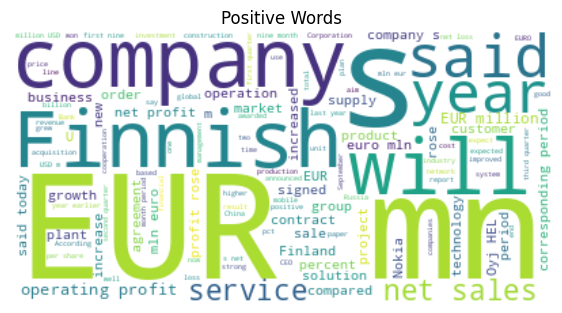

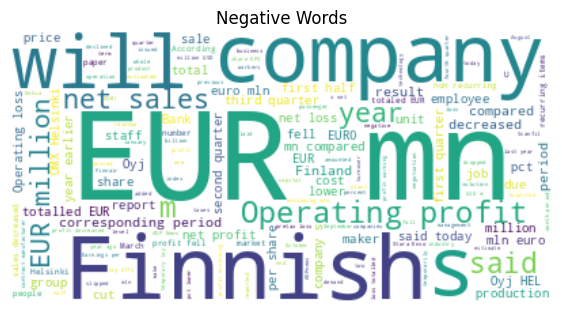

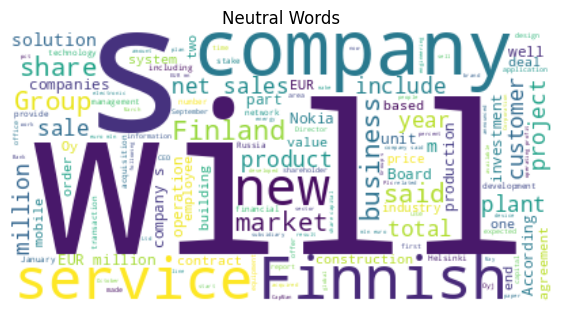

In [8]:
positive_text = " ".join([word for word in df1_new['text'][df1_new['label']=='positive']])
negative_text = " ".join([word for word in df1_new['text'][df1_new['label']=='negative']])
neutral_text = " ".join([word for word in df1_new['text'][df1_new['label']=='neutral']])

# Setting Stopwords
stopwords = set(STOPWORDS)

# Function to generate, display, and return the word cloud
def word_cloud(text, title):
    wordcloud = WordCloud(width=400, height=200, background_color='white', stopwords=stopwords).generate(text)
    plt.figure(figsize=(7, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    return wordcloud

# Generate and display word clouds for each sentiment
wordcloud_pos = word_cloud(positive_text, 'Positive Words')
wordcloud_neg = word_cloud(negative_text, 'Negative Words')
wordcloud_neu = word_cloud(neutral_text, 'Neutral Words')



**Barplot showing  total number of Sentimnts counts**

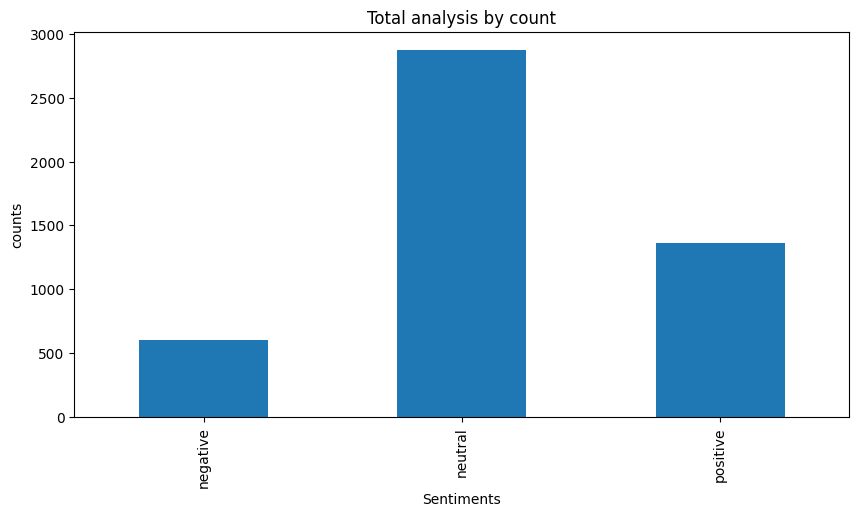

In [9]:
Plot1=df1_new['label'].value_counts().sort_index() \
      .plot(kind='bar',
            title= 'Total analysis by count',
            figsize=(10,5))
Plot1.set_xlabel("Sentiments")
Plot1.set_ylabel("counts")

plt.show()

**Total number of sentiment counts**

In [10]:
df1_new['label'].value_counts()

,count
label,
neutral,2873
positive,1363
negative,604


**Applying numericals for label Data**

In [11]:
def func(df_new):
    if df_new == 'neutral':
        return 1
    elif df_new == 'negative':
        return 0
    else:
        return 2
df1_new['label'] = df1_new['label'].apply(func)
df1_new.head()


<ipython-input-11-588c2d981122>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_new['label'] = df1_new['label'].apply(func)


,label,text
0,1,"According to Gran , the company has no plans t..."
1,1,Technopolis plans to develop in stages an area...
2,0,The international electronic industry company ...
3,2,With the new production plant the company woul...
4,2,According to the company 's updated strategy f...


**Lowering all the cases of the review**

In [13]:
df1_new['text']=df1_new['text'].str.lower()

<ipython-input-13-6b74f1bf1898>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_new['text']=df1_new['text'].str.lower()


**Importing Stopwords**

In [14]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Cleaning the Data ( removing punctuations, special characters , stopwords, )**

In [16]:
df1_new.head()

,label,text
0,1,"according to gran , the company has no plans t..."
1,1,technopolis plans to develop in stages an area...
2,0,the international electronic industry company ...
3,2,with the new production plant the company woul...
4,2,according to the company 's updated strategy f...


In [17]:
## Removing special characters
df1_new['text']=df1_new['text'].apply(lambda x : re.sub('[^a-z A-Z 0-9-]+', '',x))
## Removing the stop words
df1_new['text'] = df1_new['text'].apply(lambda x: ' '.join([y for y in x.split() if y.lower() not in stopwords.words('english')]))
## Removing the extra space
df1_new['text'] = df1_new['text'].apply(lambda x: "  ".join(x.split()))


<ipython-input-17-f15f80cc7c9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_new['text']=df1_new['text'].apply(lambda x : re.sub('[^a-z A-Z 0-9-]+', '',x))
<ipython-input-17-f15f80cc7c9d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_new['text'] = df1_new['text'].apply(lambda x: ' '.join([y for y in x.split() if y.lower() not in stopwords.words('english')]))
<ipython-input-17-f15f80cc7c9d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [18]:
df1_new.head()

,label,text
0,1,according gran company plans move product...
1,1,technopolis plans develop stages area les...
2,0,international electronic industry company ...
3,2,new production plant company would increa...
4,2,according company updated strategy years ...


**Lemmatizers (reducing a word to its base or root form)**

In [19]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
lemmatizer= WordNetLemmatizer()

In [21]:
def lemmatize_word(texts):
    return " ".join(lemmatizer.lemmatize(word) for word in texts.split())

In [22]:
df1_new['text']=df1_new['text'].apply(lambda x:lemmatize_word(x))

<ipython-input-22-04ba736b693d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_new['text']=df1_new['text'].apply(lambda x:lemmatize_word(x))


In [23]:
df1_new.head()

,label,text
0,1,according gran company plan move production ru...
1,1,technopolis plan develop stage area le 100000 ...
2,0,international electronic industry company elco...
3,2,new production plant company would increase ca...
4,2,according company updated strategy year 2009-2...


# **Train test split prior training ML Models**

In [24]:
X_train,X_test,y_train,y_test = train_test_split(df1_new['text'],df1_new['label'],
                                                 test_size=0.2,random_state=42)

**Importing TFIDF for Vectorisation**

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf= TfidfVectorizer()
X_train_Tfidf = Tfidf.fit_transform(X_train).toarray()
X_test_Tfidf = Tfidf.transform(X_test ).toarray()

In [26]:
X_train_Tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **MultinomialNB Naive Bayes**

In [27]:
nb_multi_model= MultinomialNB().fit(X_train_Tfidf,y_train)

In [28]:
y_pred_nb_multi = nb_multi_model.predict(X_test_Tfidf )

In [29]:
print("Accuracy of Mutinomial nb",accuracy_score(y_test,y_pred_nb_multi))

Accuracy of Mutinomial nb 0.6745867768595041


In [30]:
print (classification_report(y_test,y_pred_nb_multi) )

              precision    recall  f1-score   support

           0       1.00      0.02      0.03       118
           1       0.68      0.98      0.80       563
           2       0.66      0.34      0.45       287

    accuracy                           0.67       968
   macro avg       0.78      0.45      0.43       968
weighted avg       0.71      0.67      0.60       968



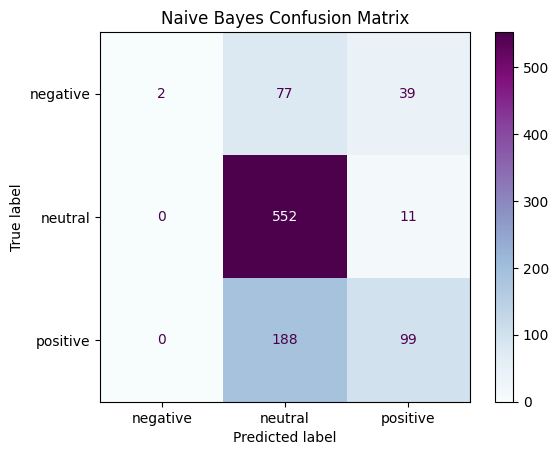

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred_nb_multi)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['negative', 'neutral', 'positive'])
disp.plot(cmap="BuPu")
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# **K-Nearest Neighbours**


In [32]:
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train_Tfidf,y_train)


In [33]:
y_pred_knn = knn_model.predict(X_test_Tfidf)

In [34]:
print("Accuracy of KNN ", accuracy_score(y_test,y_pred_knn))

Accuracy of KNN  0.6807851239669421


In [35]:
print (classification_report(y_test,y_pred_knn) )

              precision    recall  f1-score   support

           0       0.55      0.48      0.51       118
           1       0.70      0.93      0.80       563
           2       0.66      0.26      0.38       287

    accuracy                           0.68       968
   macro avg       0.64      0.56      0.56       968
weighted avg       0.67      0.68      0.64       968



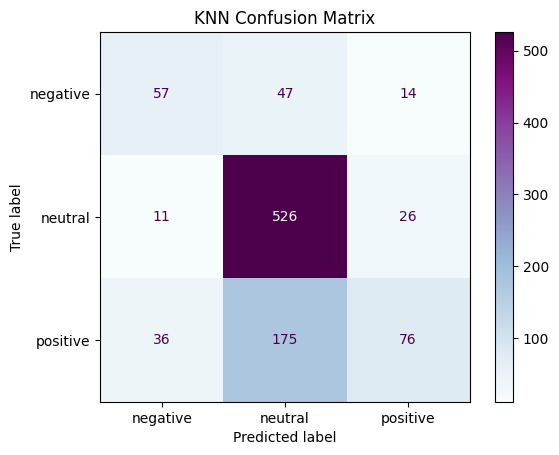

In [36]:
conf_matrix_Knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_Knn, display_labels=['negative', 'neutral', 'positive'])
disp_knn.plot(cmap="BuPu")
plt.title('KNN Confusion Matrix')
plt.show()

# **Random Forest Classifier**

In [37]:
Rf_model = RandomForestClassifier().fit(X_train_Tfidf,y_train)

In [38]:
y_pred_rf = Rf_model.predict(X_test_Tfidf)

In [39]:
print("Accuracy of RF Classifier is  ", accuracy_score(y_test,y_pred_rf))

Accuracy of RF Classifier is   0.743801652892562


In [40]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.41      0.54       118
           1       0.73      0.96      0.83       563
           2       0.78      0.45      0.57       287

    accuracy                           0.74       968
   macro avg       0.77      0.61      0.65       968
weighted avg       0.75      0.74      0.72       968



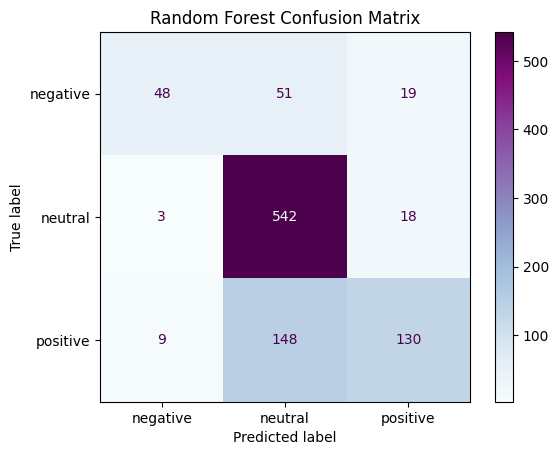

In [41]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf, display_labels=['negative', 'neutral', 'positive'])
disp_rf.plot(cmap="BuPu")
plt.title('Random Forest Confusion Matrix')
plt.show()

# **SVM (Support Vector Machine )**

In [42]:
svm_model = SVC().fit(X_train_Tfidf,y_train)

In [43]:
svm_pred= svm_model.predict(X_test_Tfidf)

In [44]:
print("Accuracy of SVM Classifier is ", accuracy_score(y_test,svm_pred))

Accuracy of SVM Classifier is  0.7128099173553719


In [45]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.74      0.33      0.46       118
           1       0.70      0.97      0.81       563
           2       0.76      0.37      0.50       287

    accuracy                           0.71       968
   macro avg       0.73      0.56      0.59       968
weighted avg       0.72      0.71      0.68       968



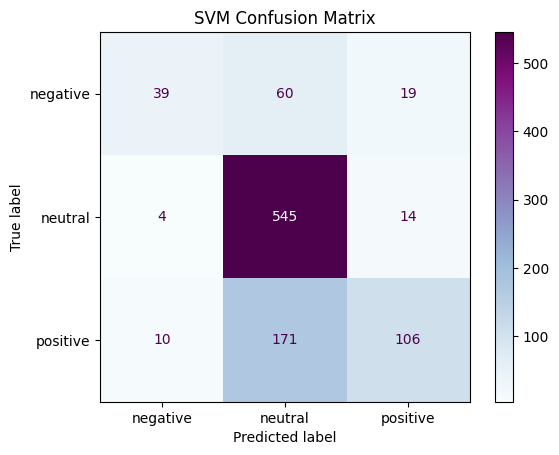

In [46]:
confusion_matrix_svm = confusion_matrix(y_test, svm_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svm, display_labels=['negative', 'neutral', 'positive'])
disp_svm.plot(cmap="BuPu")
plt.title('SVM Confusion Matrix')
plt.show()

# **Logistic Regression Classifier**

In [47]:
Log_model = LogisticRegression().fit(X_train_Tfidf,y_train)

In [48]:
Log_pred = Log_model.predict(X_test_Tfidf)

In [49]:
print("Accuracy of Logistic Regression Classifier is ", accuracy_score(y_test,Log_pred))

Accuracy of Logistic Regression Classifier is  0.7417355371900827


In [50]:
class_report = classification_report(y_test, Log_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.77      0.39      0.52       118
           1       0.73      0.96      0.83       563
           2       0.78      0.47      0.58       287

    accuracy                           0.74       968
   macro avg       0.76      0.60      0.64       968
weighted avg       0.75      0.74      0.72       968



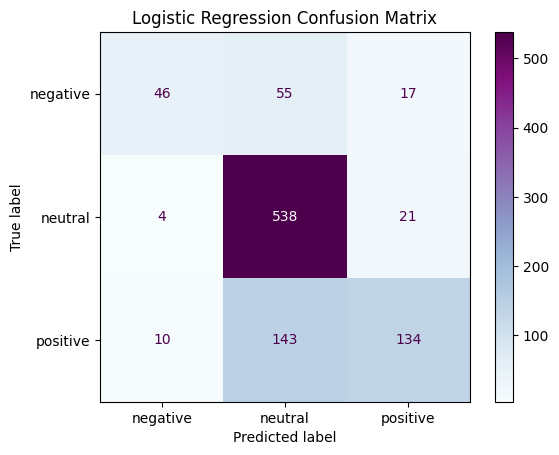

In [51]:
confusion_matrix_log = confusion_matrix(y_test, Log_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_log, display_labels=['negative', 'neutral', 'positive'])
disp_log.plot(cmap="BuPu")
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Deep Learning Techniques

In [52]:
import tensorflow as tf

In [53]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM , Bidirectional , Dropout
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [54]:
##Vocabulory Size
voc_size= 5000

In [55]:
dpl= df1.copy()

In [56]:
y=dpl['label']
x=dpl.drop('label',axis=1)

In [57]:
print(y)

0        neutral
1        neutral
2       negative
3       positive
4       positive
          ...   
4841    negative
4842     neutral
4843    negative
4844    negative
4845    negative
Name: label, Length: 4840, dtype: object


In [58]:
print(x)

                                                   text
0     According to Gran , the company has no plans t...
1     Technopolis plans to develop in stages an area...
2     The international electronic industry company ...
3     With the new production plant the company woul...
4     According to the company 's updated strategy f...
...                                                 ...
4841  LONDON MarketWatch -- Share prices ended lower...
4842  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843  Operating profit fell to EUR 35.4 mn from EUR ...
4844  Net sales of the Paper segment decreased to EU...
4845  Sales in Finland decreased by 10.5 % in Januar...

[4840 rows x 1 columns]


In [59]:
x['text'][3]

'With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .'

In [60]:
x.reset_index(inplace=True)

In [61]:
x.head()

,index,text
0,0,"According to Gran , the company has no plans t..."
1,1,Technopolis plans to develop in stages an area...
2,2,The international electronic industry company ...
3,3,With the new production plant the company woul...
4,4,According to the company 's updated strategy f...


In [62]:
import re
from nltk.corpus import stopwords

In [63]:
### Data Preprocessing
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
corpus=[]
for i in range(len(x)):
    review = re.sub('[^a-zA-Z0-9]',' ',x['text'][i])
    review = review.lower()
    review = review.split()

    review =[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review =' '.join(review)
    corpus.append(review)

In [64]:
from tensorflow.keras.preprocessing.text import one_hot

In [65]:
## One hot representation
onehot_repr = [one_hot(words,voc_size) for words in corpus]

In [66]:
### lengh of the sentence should be same

In [67]:
##To find the MAximum Lengh
maxlen = max(len(tokens) for tokens in onehot_repr)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 69


In [68]:
## Embedding representation
set_len = 69
embedded_docs= pad_sequences(onehot_repr,padding="pre",maxlen=set_len)
print(embedded_docs)

[[   0    0    0 ...  764 3055 4857]
 [   0    0    0 ... 3320  573 1918]
 [   0    0    0 ... 3006 1733   96]
 ...
 [   0    0    0 ... 4623 1703 2111]
 [   0    0    0 ... 3415 4027 2111]
 [   0    0    0 ... 3118 1400 4666]]


In [69]:
embedded_docs[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 2651,  735, 1825, 1681, 3018,
        548, 3968, 4587,  561, 3915,  847, 2085, 3055, 4477, 3450, 3837,
       3320,  573, 1918], dtype=int32)

In [70]:
## Creating the Model
embedding_vector_feature = 69
lstm_model=Sequential()
lstm_model.add(Embedding(voc_size,embedding_vector_feature,input_length=set_len))
lstm_model.add(LSTM(150))
lstm_model.add(Dropout(0.5))  # Dropout after LSTM
lstm_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(3,activation='softmax'))
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='CategoricalCrossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001)
lstm_model.build(input_shape=(None, set_len))
print(lstm_model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 69, 69)              │         345,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 150)                 │         132,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           9,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 486,859 (1.86 MB)

 Trainable params: 486,859 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

None


In [71]:
len(embedded_docs),y.shape

(4840, (4840,))

In [72]:
import numpy as np
X_final = np.array(embedded_docs)
y_final =np.array(y)

In [73]:
(X_final.shape),(y_final.shape)

((4840, 69), (4840,))

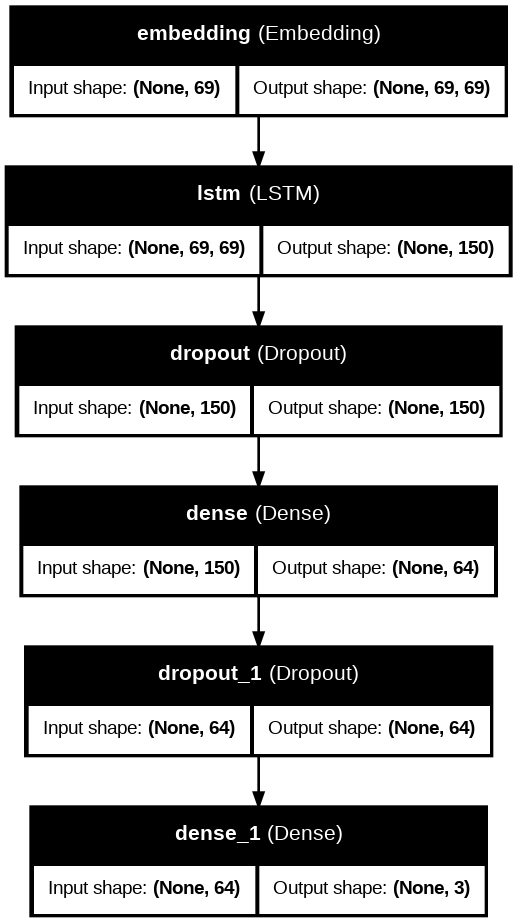

In [74]:
from keras.utils import plot_model

plot_model(lstm_model, show_shapes=True, show_layer_names=True, dpi=96)

### Train/ Test Split for DL ( LSTM )

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_final,y_final,test_size= 0.20,random_state=42)

In [76]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [77]:
y_train_categorical = to_categorical(y_train_encoded, num_classes=3)
y_test_categorical = to_categorical(y_test_encoded, num_classes=3)

### Model Training

In [78]:
lstm_Trained_mod = lstm_model.fit(X_train,y_train_categorical,validation_data= (X_test,y_test_categorical),epochs=20,batch_size=32 , callbacks=[early_stopping, reduce_lr])

Epoch 1/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.5901 - loss: 1.5756 - val_accuracy: 0.6529 - val_loss: 0.9579 - learning_rate: 0.0010
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6768 - loss: 0.8668 - val_accuracy: 0.6767 - val_loss: 0.8129 - learning_rate: 0.0010
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7483 - loss: 0.6360 - val_accuracy: 0.6550 - val_loss: 0.8364 - learning_rate: 0.0010
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8013 - loss: 0.5156 - val_accuracy: 0.6860 - val_loss: 0.8663 - learning_rate: 0.0010
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8672 - loss: 0.3801 - val_accuracy: 0.6818 - val_loss: 0.9999 - learning_rate: 5.0000e-04


## Performance Metrics and Accuracy

In [79]:
y_pred_lstm= lstm_model.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [80]:
y_pred_lstm

array([[0.06728369, 0.6920184 , 0.2406979 ],
       [0.00410391, 0.9652281 , 0.03066808],
       [0.0187553 , 0.88765   , 0.09359471],
       ...,
       [0.01318187, 0.91147095, 0.07534713],
       [0.01075828, 0.9219816 , 0.0672601 ],
       [0.3781608 , 0.11194942, 0.5098898 ]], dtype=float32)

In [81]:
y_pred_lstm.shape

(968, 3)

In [82]:
y_test.shape

(968,)

In [83]:
y_test_labels = np.argmax(y_test_categorical, axis=1)

# Convert y_pred from probabilities to class labels
y_pred_labels = np.argmax(y_pred_lstm, axis=1)


In [84]:
accuracy = accuracy_score(y_true=y_test_labels, y_pred=y_pred_labels)
accuracy

0.6766528925619835

In [85]:
class_report = classification_report(y_test_labels, y_pred_labels)
print(class_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       118
           1       0.74      0.90      0.81       563
           2       0.53      0.52      0.52       287

    accuracy                           0.68       968
   macro avg       0.42      0.47      0.45       968
weighted avg       0.59      0.68      0.63       968



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


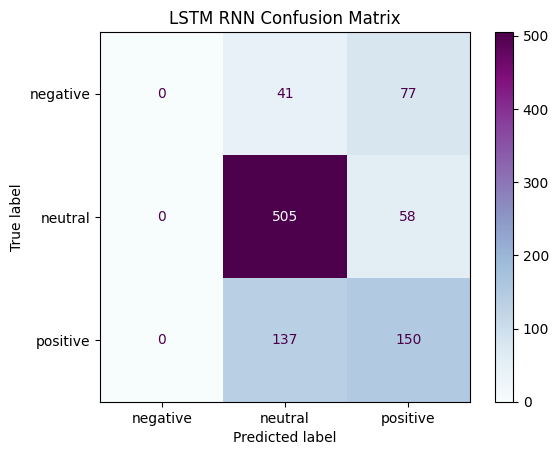

In [86]:
confusion_matrix_lstm = confusion_matrix(y_test_labels,y_pred_labels)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lstm, display_labels=['negative', 'neutral', 'positive'])
disp_lstm.plot(cmap="BuPu")
plt.title('LSTM RNN Confusion Matrix')
plt.show()

### Plotting the Graph

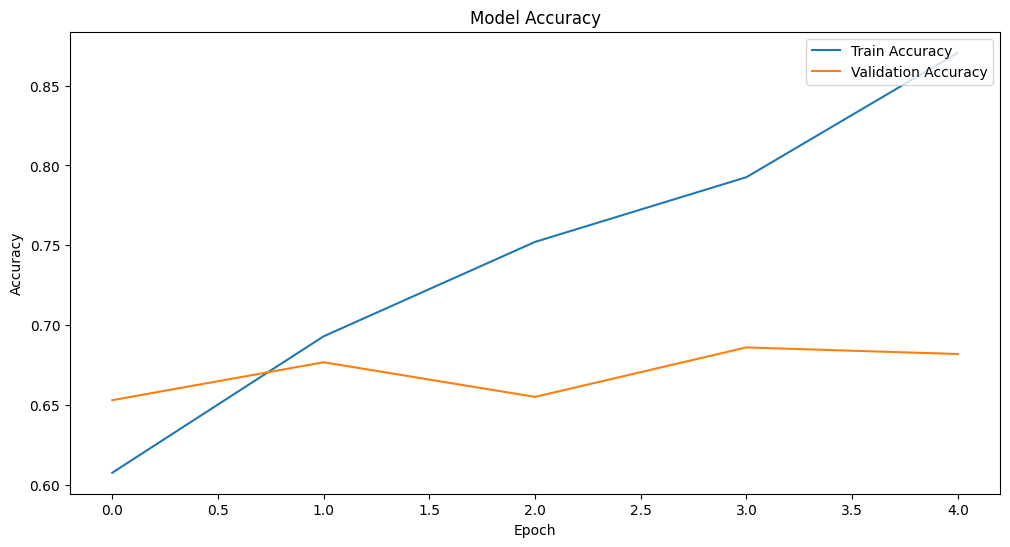

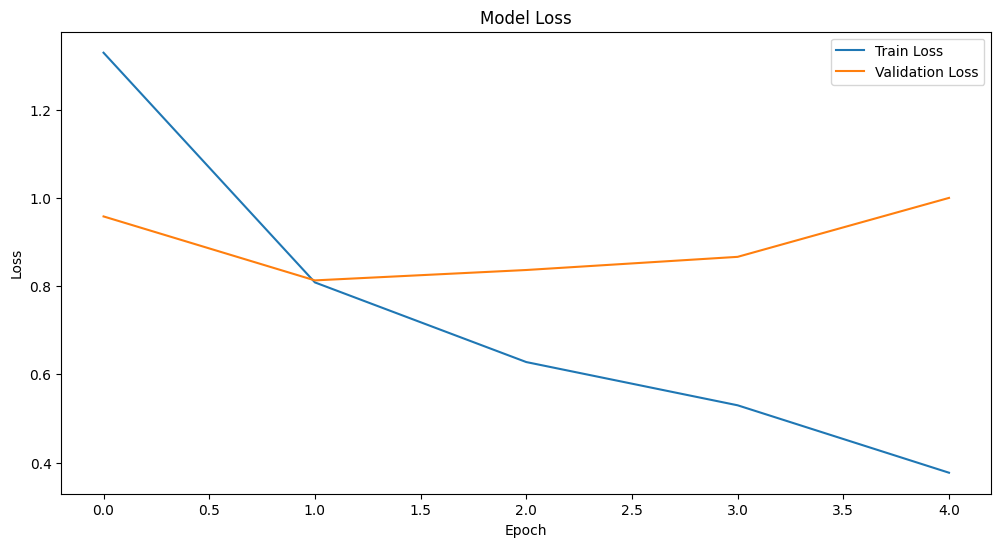

In [87]:
history = lstm_Trained_mod.history

plt.figure(figsize=(12, 6))
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

### Bidirectional LSTM Model Training

In [88]:
Bidirectional_model=Sequential()
Bidirectional_model.add(Embedding(voc_size,embedding_vector_feature,input_length=set_len))
Bidirectional_model.add(Bidirectional(LSTM(100)))
Bidirectional_model.add(Dropout(0.5))
Bidirectional_model.add(Dense(64, activation='relu'))
Bidirectional_model.add(Dense(3,activation='softmax'))
Bidirectional_model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001)
Bidirectional_model.build(input_shape=(None, set_len))
print(Bidirectional_model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 69, 69)              │         345,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 200)                 │         136,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 494,059 (1.88 MB)

 Trainable params: 494,059 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

None


Visualisation of the BiLSTM Model

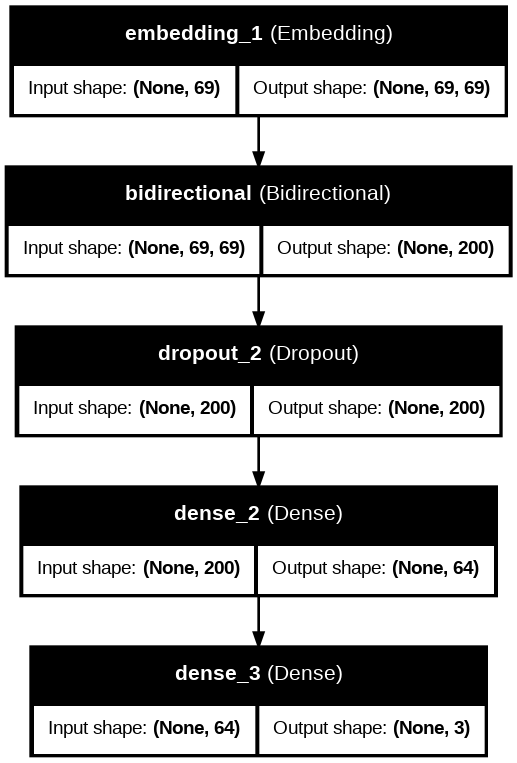

In [89]:


plot_model(Bidirectional_model, to_file='Bidirectional_model.png', show_shapes=True, show_layer_names=True, dpi=96)

In [90]:
Bidirectional_lstm_model = Bidirectional_model.fit(X_train,y_train_categorical,validation_data= (X_test,y_test_categorical),epochs=20,batch_size=32,callbacks=[early_stopping, reduce_lr] )

Epoch 1/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.5849 - loss: 0.9213 - val_accuracy: 0.6488 - val_loss: 0.7769 - learning_rate: 0.0010
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7157 - loss: 0.6551 - val_accuracy: 0.6736 - val_loss: 0.7553 - learning_rate: 0.0010
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7820 - loss: 0.4942 - val_accuracy: 0.6725 - val_loss: 0.8416 - learning_rate: 0.0010
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8541 - loss: 0.3707 - val_accuracy: 0.6994 - val_loss: 0.8794 - learning_rate: 0.0010
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9392 - loss: 0.1888 - val_accuracy: 0.7056 - val_loss: 0.9776 - learning_rate: 5.0000e-04


In [91]:
y_pred_Bidirectional= Bidirectional_model.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [92]:
y_pred_labels_bi = np.argmax(y_pred_Bidirectional, axis=1)

FInding the Accuracy of the BiLSTM model

In [93]:
accuracy = accuracy_score(y_true=y_test_labels, y_pred=y_pred_labels_bi)
accuracy

0.6735537190082644

**Classification Report of BilSTM Model**

In [94]:
class_report = classification_report(y_test_labels, y_pred_labels_bi)
print(class_report)

              precision    recall  f1-score   support

           0       0.52      0.19      0.27       118
           1       0.74      0.90      0.81       563
           2       0.51      0.44      0.47       287

    accuracy                           0.67       968
   macro avg       0.59      0.51      0.52       968
weighted avg       0.65      0.67      0.65       968



**Confusin Matrix of Bidirectional LSTM**

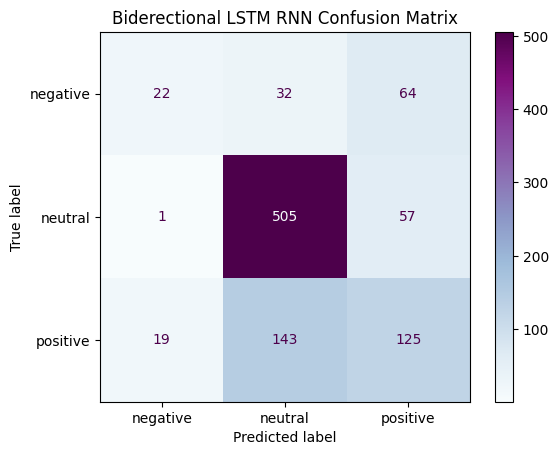

In [95]:
confusion_matrix_Bidirectional = confusion_matrix(y_test_labels,y_pred_labels_bi)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_Bidirectional, display_labels=['negative', 'neutral', 'positive'])
disp_lstm.plot(cmap="BuPu")
plt.title('Biderectional LSTM RNN Confusion Matrix')
plt.show()

**Plotting Training and Validation Loss of BiLSTM Model**

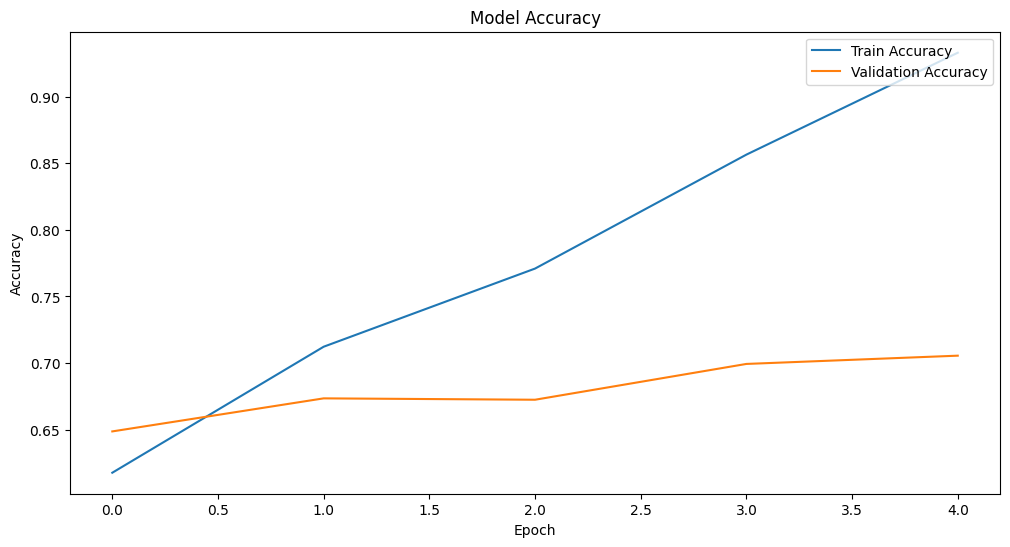

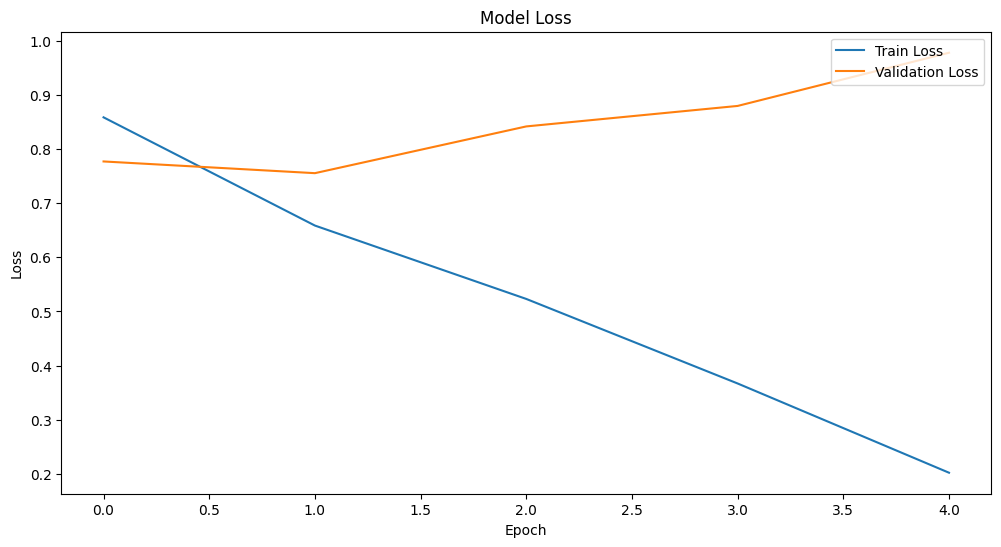

In [96]:
history_Bi = Bidirectional_lstm_model.history

plt.figure(figsize=(12, 6))
plt.plot(history_Bi['accuracy'], label='Train Accuracy')
plt.plot(history_Bi['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_Bi['loss'], label='Train Loss')
plt.plot(history_Bi['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

**Vader sentiment Scoring**

In [97]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

In [98]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [99]:
sia = SentimentIntensityAnalyzer()


In [100]:
sia.polarity_scores('it was the worse thing ever ')

{'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'compound': -0.4767}

In [101]:
df1.reset_index(inplace=True)

In [102]:
df1.head()

,index,label,text
0,0,neutral,"According to Gran , the company has no plans t..."
1,1,neutral,Technopolis plans to develop in stages an area...
2,2,negative,The international electronic industry company ...
3,3,positive,With the new production plant the company woul...
4,4,positive,According to the company 's updated strategy f...


**Running the polarity score for all the Corpus or Dataset**


In [103]:
res = {}
for i, row in tqdm(df1.iterrows(),total=len(df1)):
    text=row['text']
    myid=row['index']
    res[myid]=sia.polarity_scores(text)

100%|██████████| 4840/4840 [00:01<00:00, 2807.81it/s]


In [105]:
vaders= pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
0,0.092,0.837,0.071,-0.1280
1,0.073,0.927,0.000,-0.2960
2,0.000,1.000,0.000,0.0000
3,0.038,0.660,0.302,0.8555
4,0.000,0.853,0.147,0.6705
...,...,...,...,...
4841,0.272,0.656,0.072,-0.7269
4842,0.000,1.000,0.000,0.0000
4843,0.000,0.751,0.249,0.7430
4844,0.000,0.934,0.066,0.4404


In [106]:
merged_df = vaders.merge(df1, left_index=True, right_index=True)
merged_df

,neg,neu,pos,compound,index,label,text
0,0.092,0.837,0.071,-0.1280,0,neutral,"According to Gran , the company has no plans t..."
1,0.073,0.927,0.000,-0.2960,1,neutral,Technopolis plans to develop in stages an area...
2,0.000,1.000,0.000,0.0000,2,negative,The international electronic industry company ...
3,0.038,0.660,0.302,0.8555,3,positive,With the new production plant the company woul...
4,0.000,0.853,0.147,0.6705,4,positive,According to the company 's updated strategy f...
...,...,...,...,...,...,...,...
4835,0.000,1.000,0.000,0.0000,4841,negative,LONDON MarketWatch -- Share prices ended lower...
4836,0.000,0.868,0.132,0.4404,4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4837,0.000,1.000,0.000,0.0000,4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4838,0.000,0.868,0.132,0.4404,4844,negative,Net sales of the Paper segment decreased to EU...


 **Plottin Vaders reviews**

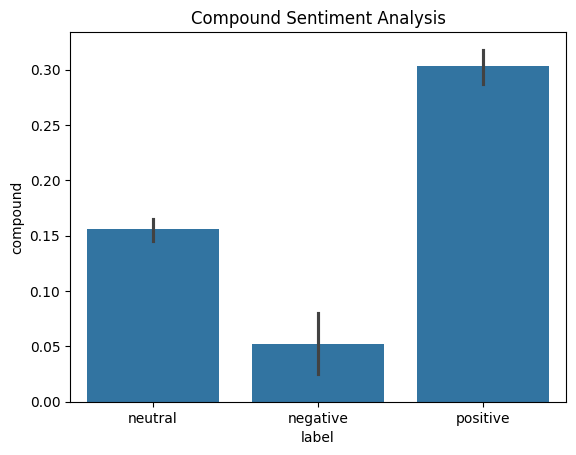

In [108]:
ax=sns.barplot(data= merged_df,x='label',y= 'compound')
ax.set_title("Compound Sentiment Analysis")
plt.show()

**Separating The Polarity score as per Positive, Negative and Neutral**

In [109]:
def calculate_polarity(text):
    sia = SentimentIntensityAnalyzer()
    analyzer_dict = sia.polarity_scores(text)

    if analyzer_dict['compound'] >= 0.05:
        return "positive"
    elif analyzer_dict['compound'] <= -0.05:
        return "negative"
    else:
        return "neutral"
# apply function to text and produce new column
df1['VADER Predicted'] = df1['text'].apply(calculate_polarity)
df1.head()

,index,label,text,VADER Predicted
0,0,neutral,"According to Gran , the company has no plans t...",negative
1,1,neutral,Technopolis plans to develop in stages an area...,negative
2,2,negative,The international electronic industry company ...,neutral
3,3,positive,With the new production plant the company woul...,positive
4,4,positive,According to the company 's updated strategy f...,positive


**Confusin Matrix of Vader Tool**

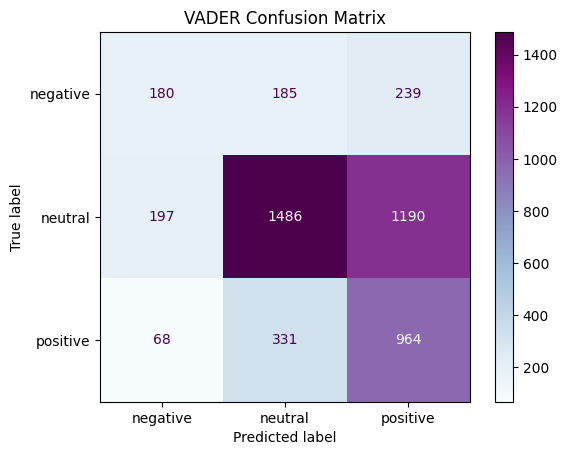

In [110]:
conf_matrix = confusion_matrix(df1['label'],df1['VADER Predicted'],labels=['negative', 'neutral', 'positive'])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['negative', 'neutral', 'positive'])
disp.plot(cmap="BuPu")
plt.title('VADER Confusion Matrix')
plt.show()

**Classification Report of VADER**

In [111]:
class_report = classification_report(df1['label'], df1['VADER Predicted'], labels=['negative', 'neutral', 'positive'])
print(class_report)

              precision    recall  f1-score   support

    negative       0.40      0.30      0.34       604
     neutral       0.74      0.52      0.61      2873
    positive       0.40      0.71      0.51      1363

    accuracy                           0.54      4840
   macro avg       0.52      0.51      0.49      4840
weighted avg       0.60      0.54      0.55      4840



### Roberta Scoring



##  **Import all the libraries of transformers for RoBERTa and FinBERT**



In [112]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch
from tqdm import tqdm

In [113]:
!pip install torch torchvision torchaudio

In [114]:
# initialize roberta model
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer_rob = AutoTokenizer.from_pretrained(model_name)
model_rob = AutoModelForSequenceClassification.from_pretrained(model_name)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [115]:
df2.reset_index(inplace=True)

In [116]:
df2.head()

,index,label,text
0,0,neutral,"According to Gran , the company has no plans t..."
1,1,neutral,Technopolis plans to develop in stages an area...
2,2,negative,The international electronic industry company ...
3,3,positive,With the new production plant the company woul...
4,4,positive,According to the company 's updated strategy f...


**Deploying RoBERTa score over whole text**

In [117]:
def rob_polarity_scores(example):
    encoded_text = tokenizer_rob(example, return_tensors='pt')
    output = model_rob (**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

**Saving the RoBERTa score in a dictionary using for loop**

In [118]:
res = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    try:
        text = row['text']
        myid = row['index']

        # Get RoBERTa polarity scores
        roberta_result = rob_polarity_scores(text)

        # Store the results in the dictionary
        res[myid] = roberta_result
    except RuntimeError:
        print(f'Error in loading for id {myid}')

100%|██████████| 4840/4840 [18:16<00:00,  4.41it/s]


In [119]:
print(res)

{0: {'roberta_neg': 0.030571217, 'roberta_neu': 0.8878432, 'roberta_pos': 0.08158554}, 1: {'roberta_neg': 0.008208321, 'roberta_neu': 0.8582982, 'roberta_pos': 0.13349354}, 2: {'roberta_neg': 0.68570405, 'roberta_neu': 0.3060532, 'roberta_pos': 0.008242758}, 3: {'roberta_neg': 0.0069314726, 'roberta_neu': 0.25657427, 'roberta_pos': 0.7364943}, 4: {'roberta_neg': 0.008639939, 'roberta_neu': 0.58772457, 'roberta_pos': 0.40363547}, 5: {'roberta_neg': 0.00501972, 'roberta_neu': 0.20230922, 'roberta_pos': 0.7926711}, 6: {'roberta_neg': 0.022719732, 'roberta_neu': 0.728958, 'roberta_pos': 0.24832225}, 7: {'roberta_neg': 0.010276905, 'roberta_neu': 0.49284646, 'roberta_pos': 0.4968767}, 8: {'roberta_neg': 0.0116041945, 'roberta_neu': 0.6082503, 'roberta_pos': 0.3801455}, 9: {'roberta_neg': 0.009594709, 'roberta_neu': 0.6216085, 'roberta_pos': 0.36879674}, 10: {'roberta_neg': 0.0035524475, 'roberta_neu': 0.33394387, 'roberta_pos': 0.66250366}, 11: {'roberta_neg': 0.0051503703, 'roberta_neu': 0

**Converting Dictionary to DataFrame**

In [120]:
results_df2 = pd.DataFrame(res).T
results_df2

,roberta_neg,roberta_neu,roberta_pos
0,0.030571,0.887843,0.081586
1,0.008208,0.858298,0.133494
2,0.685704,0.306053,0.008243
3,0.006931,0.256574,0.736494
4,0.008640,0.587725,0.403635
...,...,...,...
4841,0.667345,0.317559,0.015096
4842,0.355019,0.607594,0.037387
4843,0.350571,0.623473,0.025957
4844,0.336052,0.634238,0.029710


In [121]:
results_df2 = pd.DataFrame(res).T
results_df2 = results_df2.reset_index().rename(columns={'index': 'Id'})
results_df2 = results_df2.merge(df2, left_index=True, right_index=True)

In [122]:
results_df2

,Id,roberta_neg,roberta_neu,roberta_pos,index,label,text
0,0,0.030571,0.887843,0.081586,0,neutral,"According to Gran , the company has no plans t..."
1,1,0.008208,0.858298,0.133494,1,neutral,Technopolis plans to develop in stages an area...
2,2,0.685704,0.306053,0.008243,2,negative,The international electronic industry company ...
3,3,0.006931,0.256574,0.736494,3,positive,With the new production plant the company woul...
4,4,0.008640,0.587725,0.403635,4,positive,According to the company 's updated strategy f...
...,...,...,...,...,...,...,...
4835,4841,0.667345,0.317559,0.015096,4841,negative,LONDON MarketWatch -- Share prices ended lower...
4836,4842,0.355019,0.607594,0.037387,4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4837,4843,0.350571,0.623473,0.025957,4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4838,4844,0.336052,0.634238,0.029710,4844,negative,Net sales of the Paper segment decreased to EU...


**Labelling as per Roberta Score**

In [124]:
def determine_label(roberta_scores):
    if roberta_scores['roberta_pos'] > roberta_scores['roberta_neg'] and roberta_scores['roberta_pos'] > roberta_scores['roberta_neu']:
        return 'positive'
    elif roberta_scores['roberta_neg'] > roberta_scores['roberta_pos'] and roberta_scores['roberta_neg'] > roberta_scores['roberta_neu']:
        return 'negative'
    else:
        return 'neutral'

# apply function to roberta scores column and produce new column
results_df2['Roberta Predicted'] = results_df2[['roberta_pos', 'roberta_neg', 'roberta_neu']].apply(determine_label, axis=1)
results_df2.head()

,Id,roberta_neg,roberta_neu,roberta_pos,index,label,text,Roberta Predicted
0,0,0.030571,0.887843,0.081586,0,neutral,"According to Gran , the company has no plans t...",neutral
1,1,0.008208,0.858298,0.133494,1,neutral,Technopolis plans to develop in stages an area...,neutral
2,2,0.685704,0.306053,0.008243,2,negative,The international electronic industry company ...,negative
3,3,0.006931,0.256574,0.736494,3,positive,With the new production plant the company woul...,positive
4,4,0.008640,0.587725,0.403635,4,positive,According to the company 's updated strategy f...,neutral


**Confusion matrix of RoBERTa score**

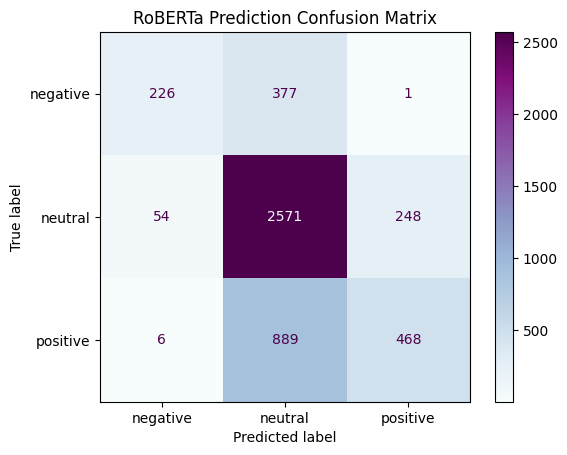

In [125]:
conf_matrix_rob = confusion_matrix(results_df2['label'], results_df2['Roberta Predicted'], labels=['negative', 'neutral', 'positive'])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rob, display_labels=['negative', 'neutral', 'positive'])
disp.plot(cmap="BuPu")
plt.title('RoBERTa Prediction Confusion Matrix')
plt.show()

In [126]:
class_report_rob = classification_report(results_df2['label'], results_df2['Roberta Predicted'], labels=['negative', 'neutral', 'positive'])
print(class_report_rob)


              precision    recall  f1-score   support

    negative       0.79      0.37      0.51       604
     neutral       0.67      0.89      0.77      2873
    positive       0.65      0.34      0.45      1363

    accuracy                           0.67      4840
   macro avg       0.70      0.54      0.57      4840
weighted avg       0.68      0.67      0.64      4840



# **Importing Transformers Library for FinBERT**


In [127]:
import torch  # PyTorch for handling model computations
import pandas as pd  # Pandas for managing data (if not already imported)
import scipy.special  # For softmax function to convert logits to probabilities

from transformers import AutoTokenizer, AutoModelForSequenceClassification  # Hugging Face Transformers for tokenizers and models

In [128]:
X_fin = df1['text'].to_list()
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model_finbert = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

 **Initialize lists to store predictions and their probabilities**

In [129]:

predictions = []
probabilities = []

# Define tokenizer parameters
tokenizer_params = {
    "padding": True,
    "truncation": True,
    "max_length": 512
}

# Iterate over the input texts
for text in X_fin:
    with torch.no_grad():
        # Tokenize the input text and convert to PyTorch tensors
        tokens = tokenizer(text, return_tensors="pt", **tokenizer_params)

        # Get the model's raw predictions (logits)
        logits = model_finbert(**tokens).logits

        # Convert logits to probabilities using softmax
        probs = scipy.special.softmax(logits.numpy().squeeze())

        # Map probabilities to their corresponding labels
        label_probs = {label: prob for label, prob in zip(model_finbert.config.id2label.values(), probs)}

        # Determine the predicted label and its associated probability
        predicted_label = max(label_probs, key=label_probs.get)
        predicted_prob = label_probs[predicted_label]

        # Store the results
        predictions.append(predicted_label)
        probabilities.append(predicted_prob)

In [130]:
df1['predicted_finbert'] =predictions

In [131]:
df1

,index,label,text,VADER Predicted,predicted_finbert
0,0,neutral,"According to Gran , the company has no plans t...",negative,neutral
1,1,neutral,Technopolis plans to develop in stages an area...,negative,neutral
2,2,negative,The international electronic industry company ...,neutral,negative
3,3,positive,With the new production plant the company woul...,positive,positive
4,4,positive,According to the company 's updated strategy f...,positive,positive
...,...,...,...,...,...
4835,4841,negative,LONDON MarketWatch -- Share prices ended lower...,negative,negative
4836,4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral,negative
4837,4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,positive,negative
4838,4844,negative,Net sales of the Paper segment decreased to EU...,positive,negative


In [132]:
accuracy = accuracy_score(df1['label'], df1['predicted_finbert'])
accuracy

0.8892561983471075

In [133]:
class_report = classification_report(df1['label'], df1['predicted_finbert'], labels=['negative', 'neutral', 'positive'])
print(class_report)

              precision    recall  f1-score   support

    negative       0.80      0.97      0.88       604
     neutral       0.96      0.86      0.91      2873
    positive       0.81      0.92      0.86      1363

    accuracy                           0.89      4840
   macro avg       0.86      0.92      0.88      4840
weighted avg       0.90      0.89      0.89      4840



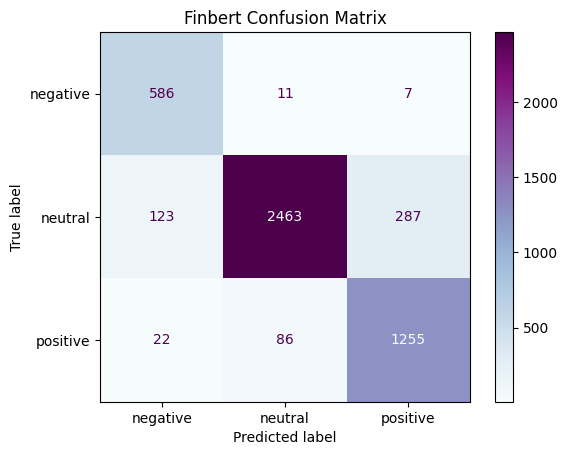

In [134]:
confusion_matrix_finbert = confusion_matrix(df1['label'], df1['predicted_finbert'], labels=['negative', 'neutral', 'positive'])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_finbert, display_labels=['negative', 'neutral', 'positive'])
disp.plot(cmap="BuPu")
plt.title('Finbert Confusion Matrix')
plt.show()

## **Thank you**